# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows the data to be perhaps exponential or multimodal in its distribution, so due to this summary statistics depending on the normal distribution may not be the most appropriate for characterizing it.

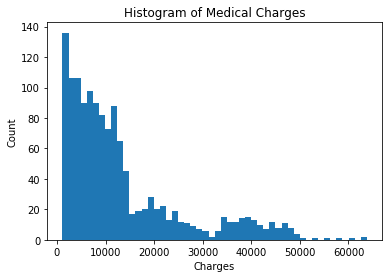

In [7]:
plt.hist(medical.charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Histogram of Medical Charges')
plt.show()

In [14]:
print('mean: %f\nmedian: %f\nstd: %f' % (medical.charges.mean(), medical.charges.median(), medical.charges.std()))

mean: 13270.422265
median: 9382.033000
std: 12110.011237


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can use the fact that we have a fair number of data points to assume that this set well approximates the actual population mean. We can also use the central limit theorem to justify an assumption of normality of the data, though from this graph there appears to be some indication that the data may be multimodal or perhaps exponentially distributed, which could mean a test other than a z-test or t-test could be more representative of the sample.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ Since the administrator is primarily interested in whether the revenue has dropped, we can assume that a one-tailed test is appropriate, since revenue being above a certain amount is of less concern. For stringency's sake and clarity of interpretation, I prefer to assume a two-tailed hypothesis.

Looking at the resulting confidence interval derived from a t-distribution, we can see that it spans a range from 13,268 to 13,272 dollars. This large amount of variability is due to the significant right skew of the data. We can recommend to the hospital administrator that it appears the hospital's charges are still above $13,000.

In [21]:
t.ppf([.025,0.975], loc=medical.charges.mean(), df=len(medical.charges) - 1)

array([13268.46052525, 13272.38400503])

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ We assume in this case that the variances of the two groups are roughly equal.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ We calculate the independent samples t-test using the subsets of the data representing insured and uninsured patients. The resulting test statistics indicate that it is highly likely that insured patients are charged differently than the uninsured. Specifically individuals with insurance are charged much more than those without.

In [29]:
insured = medical.loc[medical.insuranceclaim == 1].charges
uninsured = medical.loc[medical.insuranceclaim == 0].charges

In [41]:
x0 = insured.mean()
x1 = uninsured.mean()
n0 = len(insured)
n1 = len(uninsured)
s0 = np.std(insured, ddof=1)
s1 = np.std(uninsured, ddof=1)
sp_numerator = (n0 - 1)*(s0**2) + (n1 - 1)*(s1**2)
sp_denominator = n0 + n1 - 2
s_pooled = np.sqrt(sp_numerator/sp_denominator)

In [42]:
t = (x0 - x1)/(s_pooled*np.sqrt(1/n0 + 1/n1))
print(t)

11.89329903087671


In [38]:
from scipy.stats import ttest_ind
ttest_ind(insured, uninsured)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ Assuming differences in variance gives an even more extreme significance value. We can conclude that this assumption of unequal variance has increased the statistical power of our test by more accurately modeling the data that we have collected.

In [40]:
ttest_ind(insured, uninsured, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy contains a z-score function. While the function can return a test value in the same manner that the t-test can, it does not account for unequal variance or allow comparison of multiple populations. This is because the z-score assumes the true population parameters are known, so a comparison of means and placement of those means within the context of the parameterized population distribution is the extent of the calculation. We can say whether a sample is likely to have arisen from our population or not, but the comparison makes different assumptions than the t-test.

In [1]:
from scipy.stats import zscore
help(zscore)

Help on function zscore in module scipy.stats.stats:

zscore(a, axis=0, ddof=0)
    Calculate the z score of each value in the sample, relative to the
    sample mean and standard deviation.
    
    Parameters
    ----------
    a : array_like
        An array like object containing the sample data.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Degrees of freedom correction in the calculation of the
        standard deviation. Default is 0.
    
    Returns
    -------
    zscore : array_like
        The z-scores, standardized by mean and standard deviation of
        input array `a`.
    
    Notes
    -----
    This function preserves ndarray subclasses, and works also with
    matrices and masked arrays (it uses `asanyarray` instead of
    `asarray` for parameters).
    
    Examples
    --------
    >>> a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091,

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test